# Poker-Trading Simulator

## Introduction
This Jupyter Notebook demonstrates a Python-based simulator that explores the relationship between poker and trading. Both domains involve decision-making under uncertainty, risk management, and psychological factors. Our simulator aims to illustrate these similarities through a hybrid model.



## Setup
First, let's import the necessary libraries and define our PokerTradingSimulator class.

In [2]:
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

class PokerTradingSimulator:
    def __init__(self, initial_capital=10000, num_simulations=1000):
        self.initial_capital = initial_capital
        self.num_simulations = num_simulations
        
    def simulate_hand(self, skill_level):
        # Simulate a poker hand / trade
        # Higher skill_level increases chances of winning
        return random.random() < (0.48 + skill_level * 0.04)
    
    def calculate_bet_size(self, capital, confidence):
        # Kelly Criterion for bet sizing
        edge = confidence - 0.5
        return capital * edge if edge > 0 else 0
    
    def run_simulation(self, skill_level=0.5):
        results = []
        for _ in range(self.num_simulations):
            capital = self.initial_capital
            for _ in range(100):  # 100 hands/trades per simulation
                confidence = random.uniform(0.4, 0.6)  # Estimated win probability
                bet_size = self.calculate_bet_size(capital, confidence)
                
                if self.simulate_hand(skill_level):
                    capital += bet_size
                else:
                    capital -= bet_size
                
                if capital <= 0:
                    break
            
            results.append(capital)
        
        return results
    
    def analyze_results(self, results):
        df = pd.DataFrame(results, columns=['Final Capital'])
        
        print(f"Average final capital: ${df['Final Capital'].mean():.2f}")
        print(f"Median final capital: ${df['Final Capital'].median():.2f}")
        print(f"Win rate: {(df['Final Capital'] > self.initial_capital).mean():.2%}")
        
        plt.figure(figsize=(10, 6))
        plt.hist(df['Final Capital'], bins=50, edgecolor='black')
        plt.title('Distribution of Final Capital')
        plt.xlabel('Final Capital ($)')
        plt.ylabel('Frequency')
        plt.axvline(self.initial_capital, color='r', linestyle='dashed', linewidth=2)
        plt.text(self.initial_capital, plt.ylim()[1], 'Initial Capital', rotation=90, va='top', ha='right')
        plt.show()

## Running the Simulation

Results for average skill level:
Average final capital: $9967.10
Median final capital: $9204.67
Win rate: 41.94%


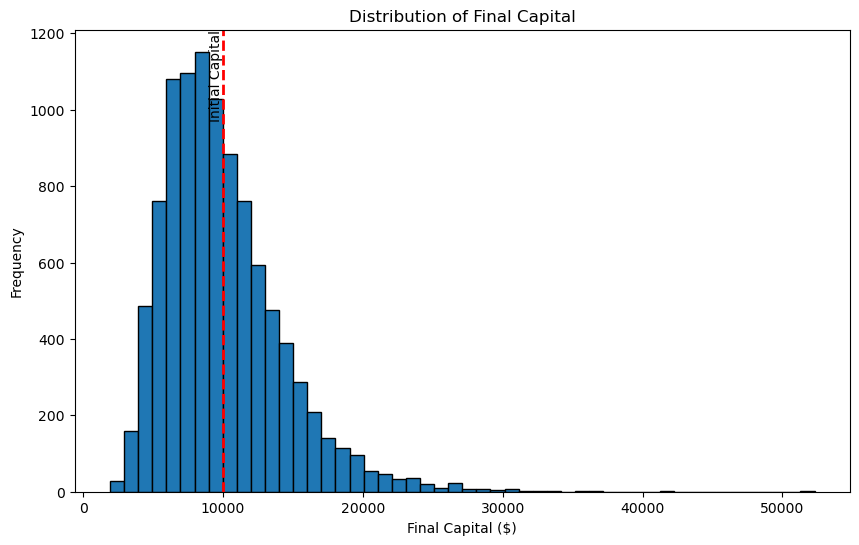


Results for high skill level:
Average final capital: $10413.49
Median final capital: $9667.15
Win rate: 46.88%


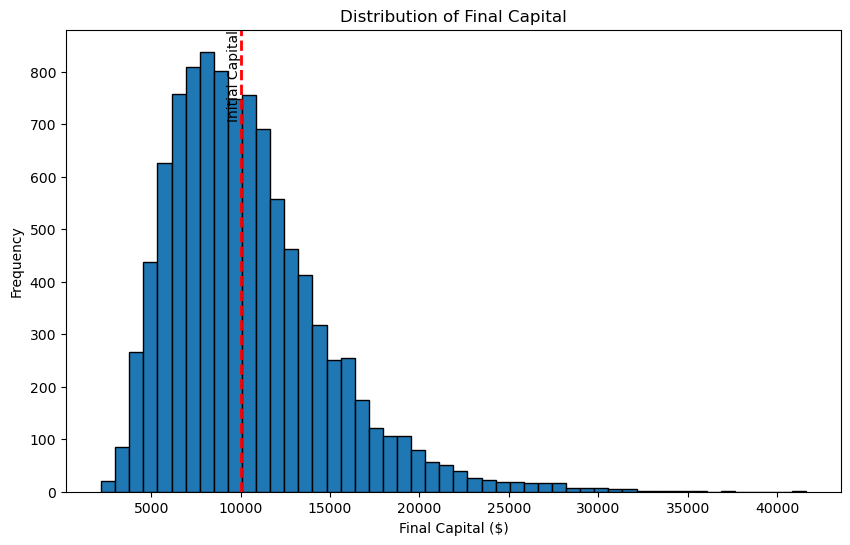

In [3]:
# Create a simulator instance
simulator = PokerTradingSimulator(initial_capital=10000, num_simulations=10000)

# Run simulation with average skill level
results_avg = simulator.run_simulation(skill_level=0.5)
print("Results for average skill level:")
simulator.analyze_results(results_avg)

# Run simulation with high skill level
results_high = simulator.run_simulation(skill_level=0.7)
print("\nResults for high skill level:")
simulator.analyze_results(results_high)

## Analysis

In [ ]:
def compare_results(results1, results2, label1, label2):
    df1 = pd.DataFrame(results1, columns=['Final Capital'])
    df2 = pd.DataFrame(results2, columns=['Final Capital'])
    
    plt.figure(figsize=(12, 6))
    plt.hist(df1['Final Capital'], bins=50, alpha=0.5, label=label1)
    plt.hist(df2['Final Capital'], bins=50, alpha=0.5, label=label2)
    plt.title('Comparison of Final Capital Distributions')
    plt.xlabel('Final Capital ($)')
    plt.ylabel('Frequency')
    plt.legend()
    plt.axvline(simulator.initial_capital, color='r', linestyle='dashed', linewidth=2)
    plt.text(simulator.initial_capital, plt.ylim()[1], 'Initial Capital', rotation=90, va='top', ha='right')
    plt.show()

    print(f"{label1} win rate: {(df1['Final Capital'] > simulator.initial_capital).mean():.2%}")
    print(f"{label2} win rate: {(df2['Final Capital'] > simulator.initial_capital).mean():.2%}")

compare_results(results_avg, results_high, "Average Skill", "High Skill")